# Compute average inflow profiles

In [1]:
%%capture
# Important header information
naluhelperdir = '/projects/AWAKEN/lcheung/awaken.github/naluhelperscripts/'
#naluhelperdir = '/ascldap/users/lcheung/local/Git/naluhelperscripts/'

# Import libraries
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.insert(1, naluhelperdir)
from numpy import *
import pickle

from matplotlib import animation
from IPython.display import HTML
import plotSamplePlaneGUI as pplane
import avgSamplePlanes as avgplane

from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [2]:
rotorD = 127
A      = np.pi/4*rotorD**2  # Rotor Area
zHH    = 90
x0     = 2000
y0     = 2560
writeoutputs = True
datadir= 'data/'

In [3]:
turbineDir   = '/pscratch/mlblayl/AWAKEN/Neutral_Turbine_Yaw'
precursorDir = '/pscratch/mlblayl/AWAKEN/Neutral_NoTurbine_Yaw'

In [4]:
expr      = 'sqrt(velocity_probe[0]**2 + velocity_probe[1]**2)'
planenum  = 0
colormap  = 'coolwarm'
nlevels   = 101
clevels   = np.linspace(0, 10, nlevels)

In [5]:
def avgInflowPlane(U):
    return np.mean(U, axis=1)

-10 6.141824687314832
-8 6.172952429110028
-6 6.185629881569344
-4 6.17647638528777
-2 6.162847989182723
0 6.161858587862461
2 6.162166736130054
4 6.162744813668164
6 6.148383636627586
8 6.12677471415411
10 6.113692523601637


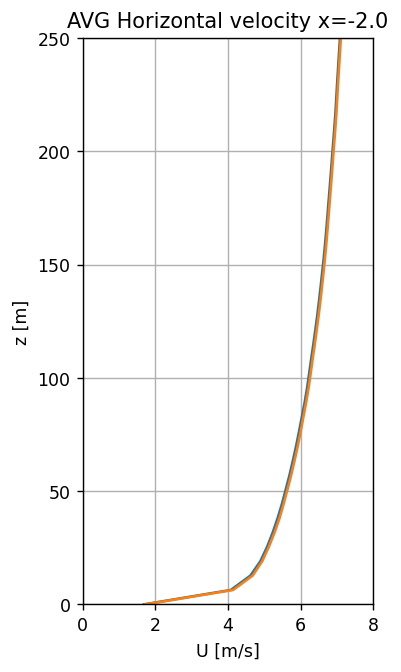

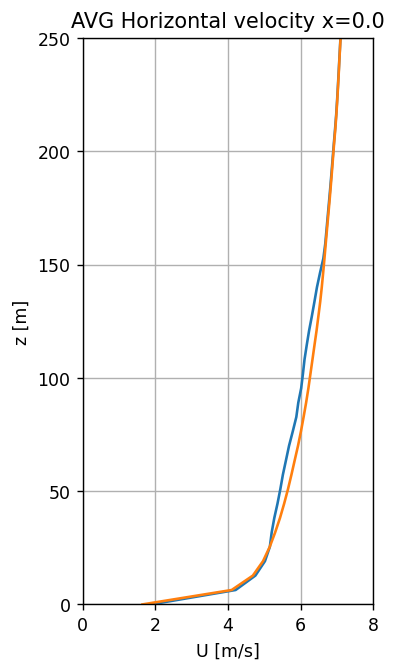

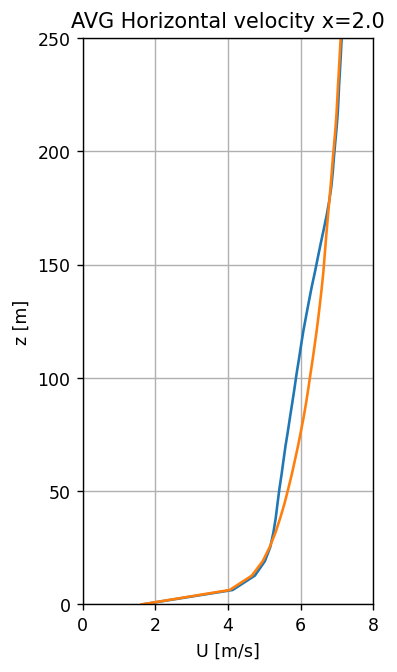

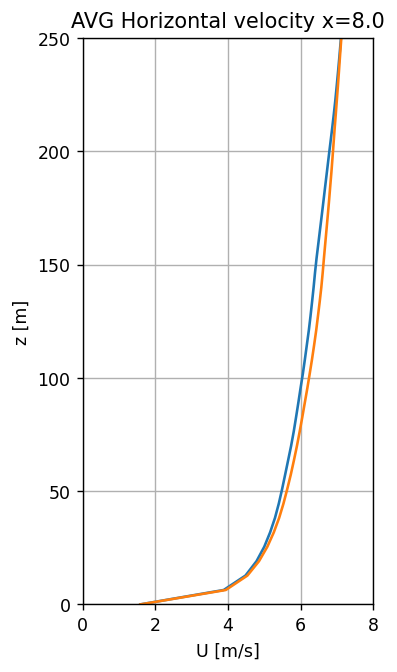

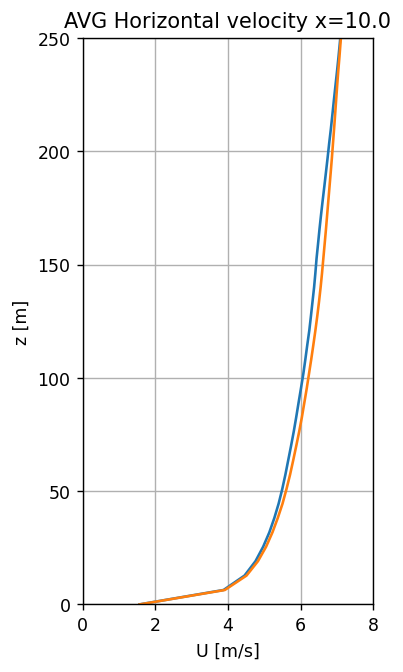

In [6]:
plotplanes = [-2, 0, 2, 8, 10]
allplanes  = np.arange(-10,11,2)
#clevels = np.linspace(-0.1, 0.9, 101
dlevels = np.linspace(-0.1, 0.9, 101)

Uhh_profile_pre = {}

for iplane in allplanes:
    planefile='Nalu_Neutral_YZslice_%02iD_long.dat'%iplane
    noturbfile='Nalu_Neutral_NT_YZslice_%02iD_long.dat'%iplane
    
    turb_avgdat, time, turb_headers=pplane.loadplanefile(turbineDir+'/'+planefile, checkcomma=False)
    noturb_avgdat, time, noturb_headers=pplane.loadplanefile(precursorDir+'/'+noturbfile, checkcomma=False)
    Z1,Y1,Uturb = pplane.getplotplane(turb_avgdat,   planenum, 6, expr=expr, headers=turb_headers, xycol=[4,5])
    Z2,Y2,Upre  = pplane.getplotplane(noturb_avgdat, planenum, 6, expr=expr, headers=noturb_headers, xycol=[4,5])
    
    # Average profile
    avgUturb = avgInflowPlane(Uturb)
    avgUpre  = avgInflowPlane(Upre)
    
    zvec = Z1[:,0]
    UHH  = np.interp(90.0, zvec, avgUpre)
    print(iplane, UHH)
    
    Uhh_profile_pre[int(iplane)] = avgUpre
    
    if iplane in plotplanes:
        fig, ax = plt.subplots(1,1,figsize=(3,6), dpi=125)
        ax.plot(avgUturb, zvec)
        ax.plot(avgUpre,  zvec)
        
        ax.set_xlabel('U [m/s]')
        ax.set_ylabel('z [m]')
        ax.set_title('AVG Horizontal velocity x=%0.1f'%(iplane))
        ax.grid(':')
        ax.set_ylim([0, 250])
        ax.set_xlim([0, 8])

In [7]:
# Save the data
if writeoutputs:
    savedat = zvec #np.vstack((zvec))
    header = 'z '
    for x, g in Uhh_profile_pre.items():
        header += repr(x)+' '
        savedat = np.vstack((savedat, g.transpose()))
    fname   = f'NALUWIND_InflowProfiles_noturbine.dat'
    np.savetxt(datadir+'/'+fname, savedat.transpose(), header=header)